# T-Teste
**Objetivo: ao fim desta aula, o aluno usará um t-teste para avaliar um p-valor**

Se você quiser ler mais sobre esse assunto, este é o [artigo de 1908](http://seismo.berkeley.edu/~kirchner/eps_120/Odds_n_ends/Students_original_paper.pdf) que originou estas discussões. O artigo discute a matemática que foi usada para resolver [este problema](https://www.uh.edu/engines/epi3072.htm) de controle de qualidade do lúpulo da cervejaria Guiness.


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('default')

# Exercício 1
*Objetivo: analisar um texto sobre o Teorema Central do Limite e emitir juízo de valor sobre ele*

Analise o texto abaixo. Você encontra inconsistências entre ele e o conteúdo das aulas anteriores? Quais? Corrija as inconsistências ou erros que encontrar.

---

Nas aulas anteriores, vimos que podemos usar o Teorema Central do Limite para relacionar a média amostral de experimentos a distribuições. De acordo com o TLC, se a distribuição de uma variável aleatória $X$ tem média $\mu$ e variância $\sigma^2$, então, se colhermos $n$ amostras de $X$, então: 
$$
Z = \frac{\bar{X} - \mu}{\sigma / \sqrt(n)} \sim N(0,1).
$$


# Exercício 2
*Objetivo: encontrar a limitação do TLC em relação à variância da variável medida*

É possível calcular a estatística Z do TLC caso não saibamos a variância populacional $\sigma^2$? Se não, por que não? Se sim, como?

# Exercício 3
*Objetivo: calcular a variância amostral $S$*

Quando não conhecemos $\sigma^2$, podemos trocá-lo pelo estimador (ou seja, por uma estimativa): 
$$
S^2 = \frac{1}{N-1} \sum_{j=1}^N (x_j-\bar{x})^2
$$

A variável `a` abaixo contém amostras de uma distribuição normal. Calcule sua variância amostral usando numpy (`np.var`). Verifique na documentação de `np.var` como usar o parâmetro `ddof` para que o estimador use $N-1$ no denominador do estimador. Após, faça o mesmo cálculo usando o `pandas`.

In [13]:
a = stats.norm.rvs(size=20)
print(np.var(a, ddof=1))
a_ = pd.Series(a)
print(a_.var(ddof=1))

0.6802775955625658
0.6802775955625657


# Exercício 4
*Objetivo: usar uma distribuição $t$ para modelar dados*

Quando não sabemos antecipadamente a variância dos dados, podemos usar uma variação do TLC em que usamos a variância amostral $S^2$ no lugar da variância populacional $\sigma^2$. Nesse caso, geramos uma estatística T que segue uma distribuição T-Student, e não mais uma normal, isto é:
$$
T = \frac{\bar{X} - \mu}{S / \sqrt(n)} \sim T(\text{df=n-1}).
$$

 A distribuição T-Student tem um parâmetro obrigatório, que é o número de graus de liberdade (df), usualmente igual ao número de amostras menos 1 (ou seja: $n-1$).

1. Pela figura abaixo, a variância da distribuição t-student é maior ou menor que a da normal?
2. O que acontece com a distribuição t-student quando aumentamos o número de graus de liberdade, isto é, aumentamos o valor de $n$ em nossas amostras?

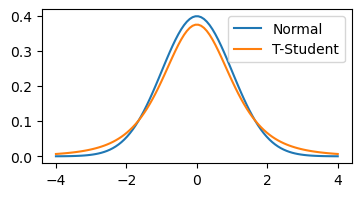

In [16]:
x = np.linspace(-4, 4, 100)
normal = stats.norm.pdf(x)
tstudent = stats.t.pdf(x, df=4)

plt.figure(figsize=(4,2))
plt.plot(x, normal, label='Normal')
plt.plot(x, tstudent, label='T-Student')
plt.legend()
plt.show()

# Exercício 5
*Objetivo: interpretar a distribuição T*

Interprete o código abaixo.

1. Que experimento está sendo realizado dentro do laço `for`?
1. O que a lista `xbar` contém? E a lista `xdev`?
1. Como as variáveis `z` e `t` foram estimadas? Qual é a diferença entre elas?
2. De acordo com a figura, qual distribuição - normal ou T - é mais adequada para modelar a variável `z`?
3. De acordo com a figura, qual distribuição - normal ou T - é mais adequada para modelar a variável `t`?
4. Suas observações condizem com as proposições sobre a validade das distriuições que fizemos anteriormente?

In [4]:
mu = 50
sigma = 10
N = 6 # elementos por amostra
M = 20000 # número de amostras
xbar = [] # média amostral de cada amostra
xdev = [] # desvio padrão amostral de cada amostra
for m in range(M):
    x = stats.norm.rvs(size=N, loc=mu, scale=sigma)
    xbar.append (np.mean(x))
    xdev.append (np.std(x, ddof=1))

xbar = np.array(xbar)
xdev = np.array(xdev)
z = (xbar-mu)/(sigma/np.sqrt(N))
t = (xbar-mu)/(xdev/np.sqrt(N))

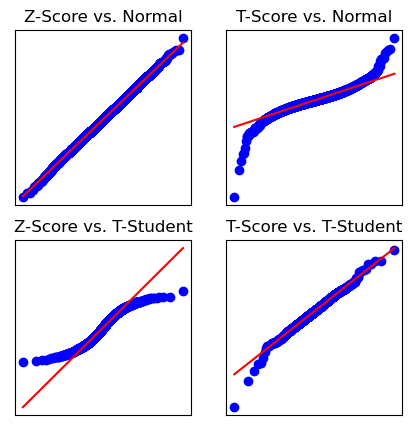

In [5]:
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
stats.probplot(z, dist='norm', plot=plt)
plt.title('Z-Score vs. Normal')
plt.xlabel("")
plt.xticks([])
plt.ylabel("")
plt.yticks([])
plt.subplot(2,2,2)
stats.probplot(t, dist='norm', plot=plt)
plt.title('T-Score vs. Normal')
plt.xlabel("")
plt.xticks([])
plt.ylabel("")
plt.yticks([])
plt.subplot(2,2,3)
stats.probplot(z, dist=stats.t(df=N-1), plot=plt)
plt.title('Z-Score vs. T-Student')
plt.xlabel("")
plt.xticks([])
plt.ylabel("")
plt.yticks([])
plt.subplot(2,2,4)
stats.probplot(t, dist=stats.t(df=N-1), plot=plt)
plt.title('T-Score vs. T-Student')
plt.xlabel("")
plt.xticks([])
plt.ylabel("")
plt.yticks([])
plt.show()

# Exercício 5
*Objetivo: usar a distribuição $T$ para tomar uma decisão*

Historicamente, em média, os jogadores de ContraAtaque fazem 400 pontos em uma partida. Um DLC pago promete aumentar os poderes do personagem, fazendo com que ele ganhe mais pontos. Porém, uma comunidade online diz que o DLC não tem efeito real sobre o jogo. Para verificar essa diferença, a empresa produtora do jogo forneceu a pontuação de alguns jogadores, que estão na variável `pontuacoes`, abaixo.

1. Calcule a média e o desvio padrão da variável `pontuacoes`
2. Estime o desvio padrão para a média de `pontuacoes`
3. Calcule a estatística T para a pontuação média, assumindo a hipótese de que a média real da distribuição é 400.
4. Assumindo que a comunidade online está certa e o DLC não tem efeito sobre o jogo, use a distribuição $T$ e a estatística que você calculou para estimar a probabilidade de observarmos um desvio de $\bar{X}$ em relação a $\mu$ ao menos tão grande quanto o desvio que foi observado. Nesse teste, considere a hipótese de observar os desvios tanto para a direita quanto para a esquerda, uma vez que não sabemos se as pontuações aumentaram ou diminuiram.

In [26]:
pontuacoes = [767.5716223460846, 367.8974774006118, 352.8151701949622, 590.6468443534766, 127.51864935975419, 727.38623666757, 490.21410968721847, 619.5274316375185, 617.1764921602684, 662.0131675506049]
# pontuacoes = pontuacoees
mu = 400
xbar = np.mean(pontuacoes)
print(xbar)
s = np.std(pontuacoes, ddof=1)
print(s)
sn = s / np.sqrt(len(pontuacoes))

T = (xbar - mu)/sn 
print(T)
p1 = 1-stats.t.cdf(T, df=len(pontuacoes)-1)
print(p1)
p2 = p1*2
print(p2)

532.2767201358068
198.13464333046915
2.111169001112696
0.03197413697887752
0.06394827395775504


# Exercício 6
*Objetivo: explicar problemas em termos de hipótese nula e hipótese alternativa*

No exercício acima, fizemos o procedimento de partir de uma hipótese (que o DLC não tem efeito sobre o jogo) para então verificar que podemos anular (ou rejeitar) essa mesma hipótese. Por isso mesmo, ela se chama hipótese nula, ou $H_0$.

O contrário dela é a hipótese alternativa, ou $H_1$, que representa o complemento de $H_0$.

Tipicamente, para testes em variáveis contínuas, temos as seguintes hipóteses nulas e alternativas, escritas em termos da média da população que gerou as amostras que testamos ($\mu_x$) e da média da população que supomos inicialmente ($\mu$):

| Hipótese nula | Hipótese alternativa |
| --- | --- |
| $\mu_x = \mu$ | $\mu_x \neq \mu$ |
| $\mu_x = \mu$ | $\mu_x > \mu$ |
| $\mu_x = \mu$ | $\mu_x < \mu$ |

1. No exercício anterior, quanto vale $\mu$? Quanto vale $\mu_x$?
1. Qual desses tipos de hipóteses nulas foi testado no exercício anterior?
1. A probabilidade de encontrarmos dados ao menos tão extremos quando nossas medições, *assumindo que H_0 é verdadeira*, é chamado de *p-valor*. Qual foi o p-valor encontrado no exercício anterior?
2. O p-valor também pode ser entendido como a *probabilidade de rejeitarmos H_0 sendo que H_0 é verdadeira* - ou seja, uma probabilidade de errarmos ao rejeitar $H_0$. Por isso, definimos um valor $\alpha$ que é um limite superior para essa probabilidade, e, se o p-valor é menos que $\alpha$, rejeitamos $H_0$. Para $\alpha=5\%$, deveríamos rejeitar $H_0$ no exercício anterior?

In [7]:
s = np.std(pontuacoes, ddof=1)
xbarra = np.mean(pontuacoes)
n = len(pontuacoes)
mu = 400
t = (xbarra-mu)/(s/np.sqrt(n))
p = 2*(1-stats.t.cdf(t, df=n-1))
print(t,p)

2.111169001112696 0.06394827395775504


# Exercício 7
*Objetivo: usar a função t-teste da API Python*

Veja a chamada abaixo da função `ttest_1samp` de Python.
1. O que são os parâmetros `pontuacoes` e `mu`?
2. O que significam as saídas `statistic` e `pvalue`? Se precisar, use os resultados dos exercícios anteriores como referência.
3. O que a função `ttest_1samp` faz?
4. O que significa "fazer um t-teste"?

In [8]:
stats.ttest_1samp(pontuacoes, mu)

Ttest_1sampResult(statistic=2.1111690011126956, pvalue=0.06394827395775511)